# Sum of Squares

Below is a sample solution to calculate the sum of the squares of the first 1,000,000 numbers using two threads:

In [ ]:
# Import the threading library
import threading

# Create a list to hold the results of the two threads
# Each entry will be the sum of the squares calculated by each thread
results = [0, 0]

def sum_of_squares(first, last, results, thread_number):
    # A function which calculates the sum of the squares from first to last (inclusive)
    # Saves the results into results[thread_number]
    for i in range(first, last + 1):
        results[thread_number] += i ** 2

# Create a list to hold the threads
threads = []

# Create two threads, each calculating the sum of the squares of half of the numbers
for i in range(2):
    # Create a thread
    # Pass arguments to sum_of_squares using the args parameter
    t = threading.Thread(target=sum_of_squares, args=(1 + i * 500000, 500000 + i * 500000, results, i))
    # Start each threads
    t.start()
    # Add the thread to the list of threads
    threads.append(t)

# Wait for all threads to finish
for t in threads:
    t.join()

# Sum the results of the two threads
final_result = sum(results)

# Print the final result
print(final_result)

333333833333500000


# Cumulative Distribution Function

Note that in this sample solution the filepaths have been altered so the correct data files can be found.

Single-thread time taken: 0.8118045330047607
6
16
Multi-thread time taken: 0.942133903503418


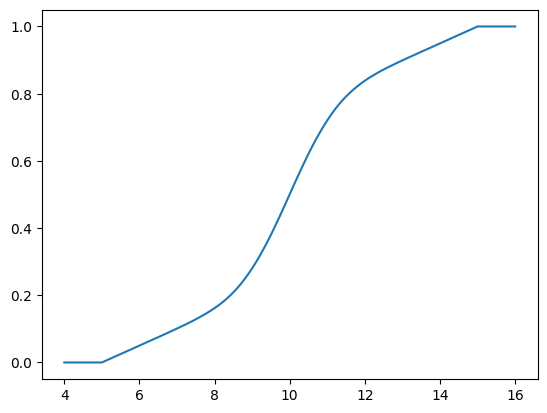

In [7]:
import threading
import numpy as np
import matplotlib.pyplot as plt
import time

# These are thresholds for the CDF
# Use them in your code
thresholds = np.linspace(4, 16, 121)


# SINGLE-THREAD VERSION
start_time = time.time()
# Load the files into a number of numpy arrays within a list
data_list = [np.loadtxt(f'../data/threading_{i}.txt') for i in range(10)]

# Concatenate the arrays in the list into a single array
data = np.concatenate(data_list)

# Create an array to hold the CDF
cdf = np.zeros_like(thresholds)

# Loop over the thresholds, counting the number of values below each threshold
for i, threshold in enumerate(thresholds):
    cdf[i] = np.sum(data < threshold)

# Divide by the number of values to get the CDF
cdf = cdf / len(data)

print(f'Single-thread time taken: {time.time() - start_time}')

# MULTI-THREAD VERSION
start_time = time.time()

# This function will be run by each thread
def get_cdf_from_file(filepath, results):
    # This function loads data from a file and calculates the CDF
    # The CDF is saved to the numpy array results

    # Load the data from the file
    data = np.loadtxt(filepath)

    # Loop over the thresholds
    for i, threshold in enumerate(thresholds):
        # Count the number of values below the threshold
        # Divide by the number of values to get the CDF
        results[i] = np.sum(data < threshold) / len(data)

# Create a list to hold the threads
threads = []
# Create a list to hold the results from each thread
cdfs = [np.zeros_like(thresholds) for i in range(10)]

# Loop over the 10 files
for i in range(10):
    # For each file create a thread to calculate the CDF for the data in that file
    t = threading.Thread(target=get_cdf_from_file, args=(f'../data/threading_{i}.txt', cdfs[i]))
    # Start the thread
    t.start()
    # Add the thread to the list of threads
    threads.append(t)

# Wait for all threads to finish
for t in threads:
    t.join()

# Sum all the CDFs
# Divide by 10 to normalise the CDF
cdf = np.sum(cdfs, axis=0) / 10

print(f'Multi-thread time taken: {time.time() - start_time}')

# Plot the CDF
plt.plot(thresholds, cdf);